In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib;print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11486039964104904889
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9204972913
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7629801697969448868
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X , train_Y ) , (test_X , test_Y) = fashion_mnist.load_data()
print(len(train_X),len(test_X))

4423680/4422102 [==============================] - 3s 1us/step
60000 10000


In [5]:
!pip install matplotlib numpy

^C


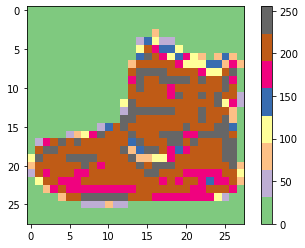

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0],cmap='Accent')

plt.colorbar()
plt.show()

In [7]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_X[0].shape

(28, 28)

In [9]:
train_X = train_X / 255.
test_X = test_X / 255.

train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# no need if i use 'sparse categorical crossentropy'
#train_Y = tf.keras.utils.to_categorical(train_Y,num_classes=3)
#test_Y = tf.keras.utils.to_categorical(test_Y,num_classes=3)

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(units=128,activation='relu'),
                             tf.keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(train_X,train_Y,epochs=250,validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/250
45000/45000 [==============================] - 4s 85us/sample - loss: 0.5230 - accuracy: 0.8152 - val_loss: 0.4891 - val_accuracy: 0.8299
Epoch 2/250
45000/45000 [==============================] - 3s 75us/sample - loss: 0.3960 - accuracy: 0.8576 - val_loss: 0.3857 - val_accuracy: 0.8613
Epoch 3/250
45000/45000 [==============================] - 3s 75us/sample - loss: 0.3523 - accuracy: 0.8732 - val_loss: 0.3617 - val_accuracy: 0.8685
Epoch 4/250
45000/45000 [==============================] - 3s 73us/sample - loss: 0.3234 - accuracy: 0.8819 - val_loss: 0.3782 - val_accuracy: 0.8635
Epoch 5/250
45000/45000 [==============================] - 4s 82us/sample - loss: 0.3038 - accuracy: 0.8898 - val_loss: 0.3435 - val_accuracy: 0.8775
Epoch 6/250
45000/45000 [==============================] - 3s 75us/sample - loss: 0.2885 - accuracy: 0.8942 - val_loss: 0.3420 - val_accuracy: 0.8793
Epoch 7/250
45000/45000 [=========================

Epoch 55/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0790 - accuracy: 0.9694 - val_loss: 0.5489 - val_accuracy: 0.8861
Epoch 56/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0781 - accuracy: 0.9702 - val_loss: 0.5339 - val_accuracy: 0.8853
Epoch 57/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0769 - accuracy: 0.9722 - val_loss: 0.5360 - val_accuracy: 0.8870
Epoch 58/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0760 - accuracy: 0.9717 - val_loss: 0.5666 - val_accuracy: 0.8877
Epoch 59/250
45000/45000 [==============================] - 3s 73us/sample - loss: 0.0719 - accuracy: 0.9735 - val_loss: 0.6031 - val_accuracy: 0.8787
Epoch 60/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0736 - accuracy: 0.9724 - val_loss: 0.5727 - val_accuracy: 0.8814
Epoch 61/250
45000/45000 [==============================] - 3s 72us/sample - loss: 0.0724 - ac

45000/45000 [==============================] - 3s 75us/sample - loss: 0.0402 - accuracy: 0.9853 - val_loss: 0.7983 - val_accuracy: 0.8874
Epoch 110/250
45000/45000 [==============================] - 3s 74us/sample - loss: 0.0372 - accuracy: 0.9866 - val_loss: 0.8690 - val_accuracy: 0.8825
Epoch 111/250
45000/45000 [==============================] - 4s 80us/sample - loss: 0.0417 - accuracy: 0.9856 - val_loss: 0.8268 - val_accuracy: 0.8802
Epoch 112/250
45000/45000 [==============================] - 3s 73us/sample - loss: 0.0352 - accuracy: 0.9876 - val_loss: 0.9202 - val_accuracy: 0.8803
Epoch 113/250
45000/45000 [==============================] - 3s 72us/sample - loss: 0.0397 - accuracy: 0.9858 - val_loss: 0.8467 - val_accuracy: 0.8839
Epoch 114/250
45000/45000 [==============================] - 3s 70us/sample - loss: 0.0383 - accuracy: 0.9862 - val_loss: 0.8331 - val_accuracy: 0.8892
Epoch 115/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0337 - accuracy:

Epoch 163/250
45000/45000 [==============================] - 3s 78us/sample - loss: 0.0291 - accuracy: 0.9898 - val_loss: 1.0567 - val_accuracy: 0.8855
Epoch 164/250
45000/45000 [==============================] - 4s 86us/sample - loss: 0.0212 - accuracy: 0.9924 - val_loss: 1.0591 - val_accuracy: 0.8876
Epoch 165/250
45000/45000 [==============================] - 3s 77us/sample - loss: 0.0250 - accuracy: 0.9907 - val_loss: 1.0763 - val_accuracy: 0.8875
Epoch 166/250
45000/45000 [==============================] - 4s 78us/sample - loss: 0.0248 - accuracy: 0.9914 - val_loss: 1.0497 - val_accuracy: 0.8910
Epoch 167/250
45000/45000 [==============================] - 3s 71us/sample - loss: 0.0222 - accuracy: 0.9922 - val_loss: 1.1172 - val_accuracy: 0.8849
Epoch 168/250
45000/45000 [==============================] - 3s 74us/sample - loss: 0.0292 - accuracy: 0.9900 - val_loss: 1.1169 - val_accuracy: 0.8787
Epoch 169/250
45000/45000 [==============================] - 3s 72us/sample - loss: 0.02

Epoch 217/250
45000/45000 [==============================] - 4s 87us/sample - loss: 0.0154 - accuracy: 0.9950 - val_loss: 1.2957 - val_accuracy: 0.8873
Epoch 218/250
45000/45000 [==============================] - 4s 86us/sample - loss: 0.0227 - accuracy: 0.9926 - val_loss: 1.2676 - val_accuracy: 0.8883
Epoch 219/250
45000/45000 [==============================] - 4s 88us/sample - loss: 0.0162 - accuracy: 0.9944 - val_loss: 1.2250 - val_accuracy: 0.8851
Epoch 220/250
45000/45000 [==============================] - 4s 88us/sample - loss: 0.0228 - accuracy: 0.9924 - val_loss: 1.2854 - val_accuracy: 0.8846
Epoch 221/250
45000/45000 [==============================] - 4s 85us/sample - loss: 0.0192 - accuracy: 0.9939 - val_loss: 1.2454 - val_accuracy: 0.8849
Epoch 222/250
45000/45000 [==============================] - 4s 80us/sample - loss: 0.0164 - accuracy: 0.9946 - val_loss: 1.2420 - val_accuracy: 0.8884
Epoch 223/250
45000/45000 [==============================] - 4s 80us/sample - loss: 0.01

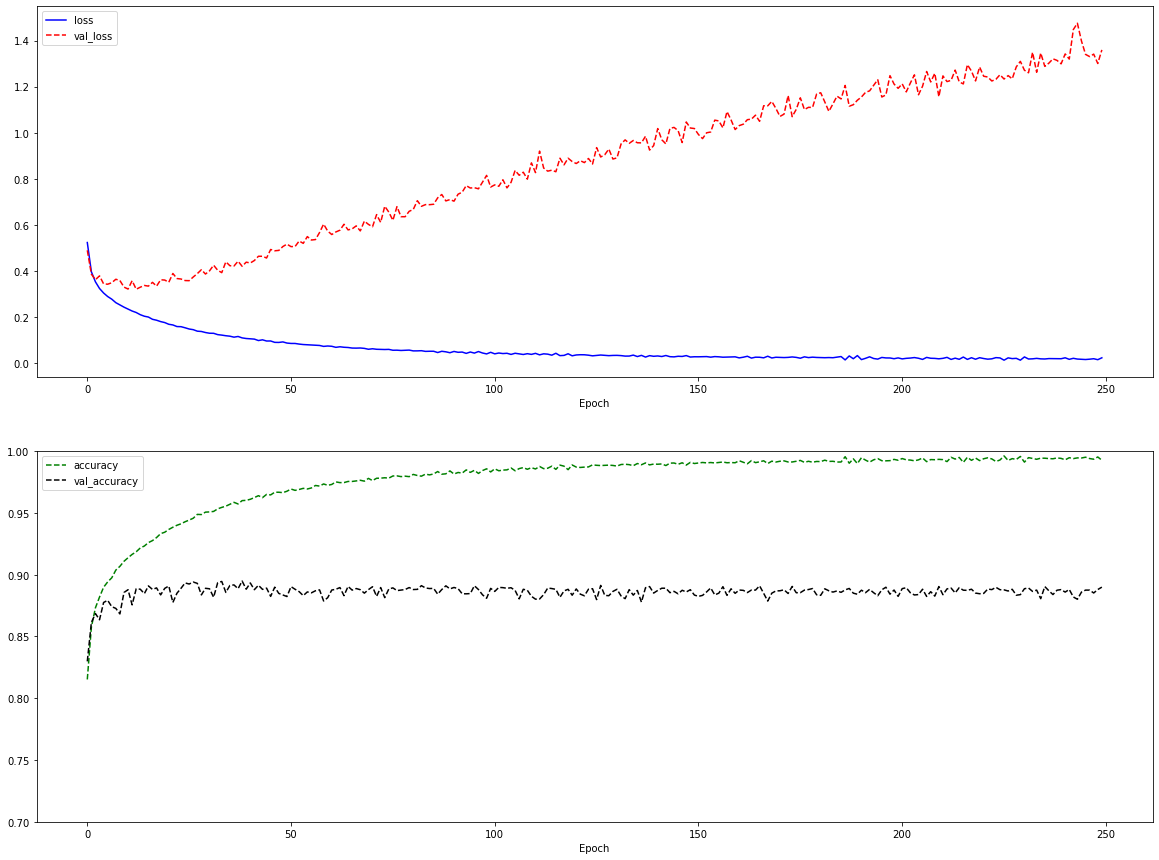

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'g--',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

In [14]:
model.evaluate(test_X,test_Y)

10000/10000 [==============================] - 0s 44us/sample - loss: 1.4857 - accuracy: 0.8815


[1.4856718108879403, 0.8815]